In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import FontManager
from PIL import Image
import urllib
import os

In [75]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [108]:
df = pd.read_csv('D:/stats project/finaldata_csv (for viz)/passingnew.csv', encoding = "utf-8")
df

,Player,Squad,Cmp,Cmp%,pp90,Team_id,Pos
0,Virgil van Dijk,Liverpool,2287,90.8,67.26,8650,DF
1,Jordi Alba,Barcelona,2336,84.3,79.46,8634,DF
2,Thiago Silva,Chelsea,2345,92.9,79.76,8455,MF
3,Maxime Lopez,Sassuolo,2357,91.7,72.30,7943,MF
4,Marcelo Brozović,Inter,2375,91.6,72.85,8636,MF
5,Sergio Busquets,Barcelona,2462,88.0,69.35,8634,MF
6,Rodri,Manchester City,2587,92.5,80.84,8456,MF
7,Aymeric Laporte,Manchester City,2703,94.7,86.08,8456,DF
8,João Cancelo,Manchester City,2752,83.9,76.66,8456,DF
9,William Saliba,Marseille,2865,93.7,79.58,8592,DF


In [3]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [52]:
def minutes_battery(minutes, ax):
    '''
    This function takes an integer and an axes and 
    plots a battery chart.
    '''
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.barh([0.5], [1], fc = 'white', ec='black', height=.35)
    ax.barh([0.5], [minutes/2865], fc = '#29a329', height=.35)
    text_ = ax.annotate(
        xy=(minutes/2865, .5),
        text=f'{minutes}',
        xytext=(-15,0),
        textcoords='offset points',
        weight='bold',
        color='#EFE9E6',
        va='center',
        ha='center',
        size=9
    )
    ax.set_axis_off()
    return ax

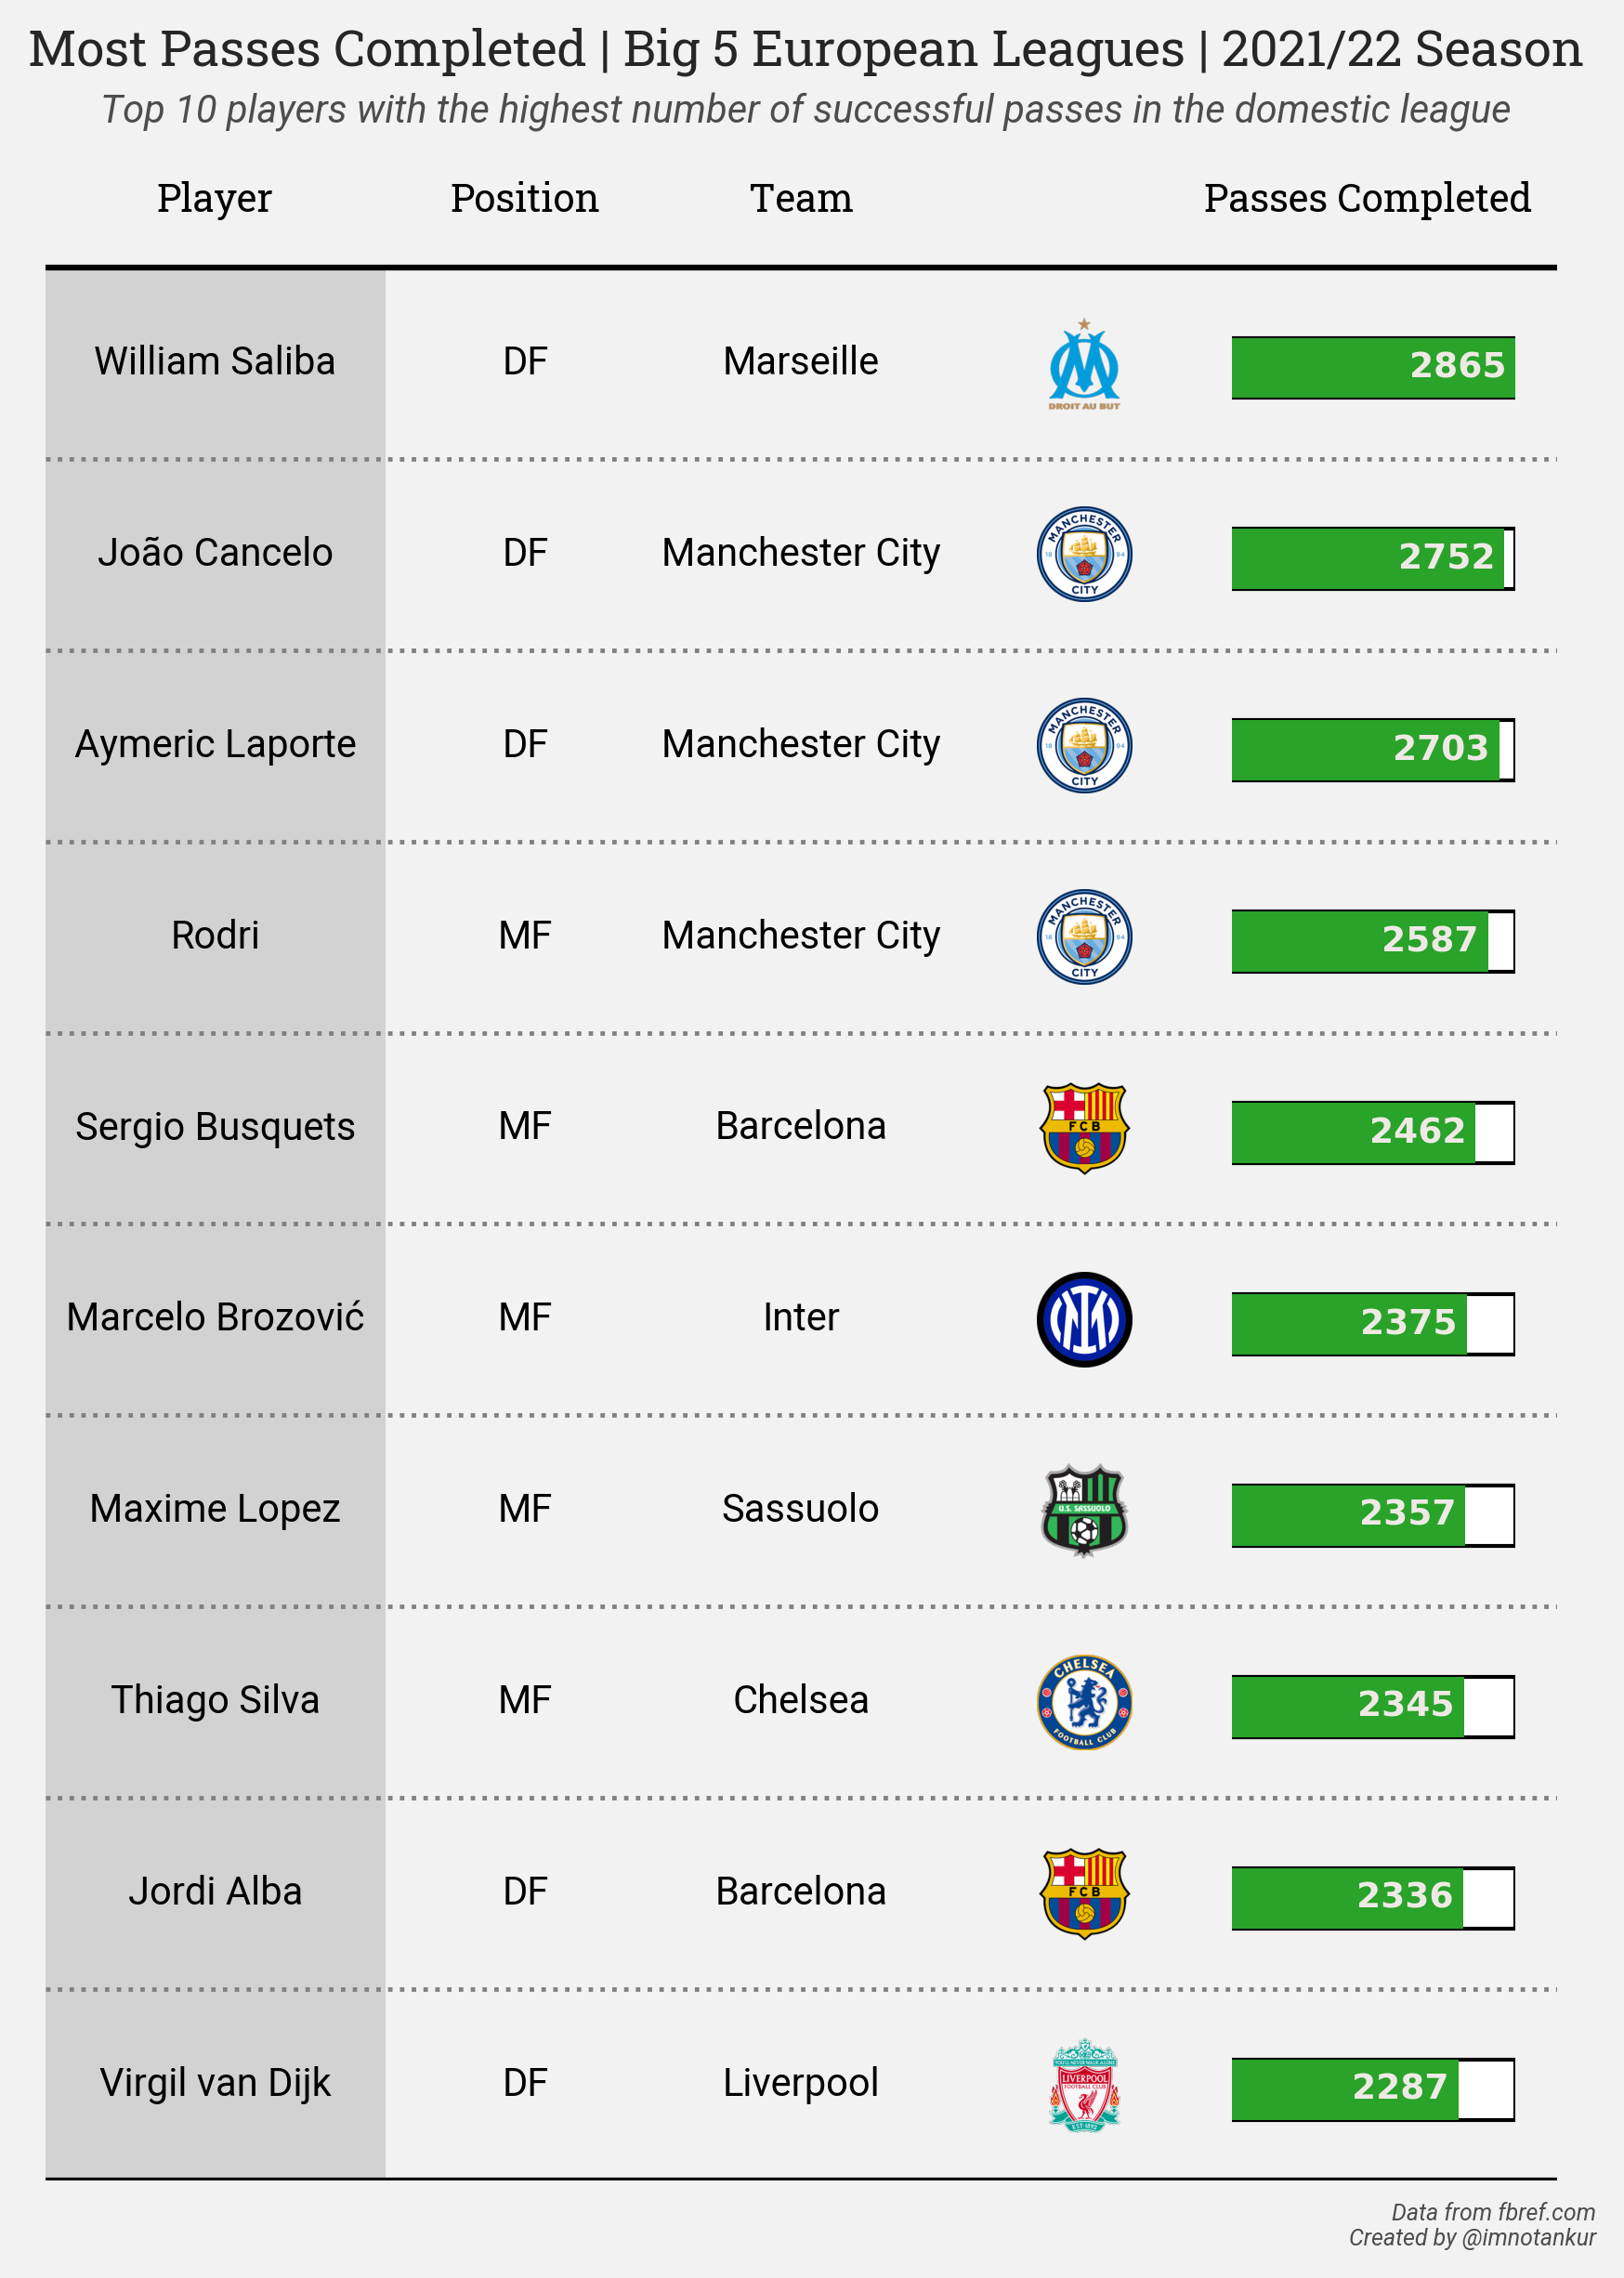

In [141]:
fig = plt.figure(facecolor='#f2f2f2',figsize=(7,10), dpi=300)
ax = plt.subplot()

ncols = 3
nrows = 10

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.45,1.27,2,3.5]
columns = ['Player','Pos', 'Squad', 'Cmp']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        ha = 'center'
        text_label = f'{df[column].iloc[i]}'
        weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            fontproperties = font_normal.prop
        )

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.5, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df['Team_id'].iloc[x], flag_ax)

ax_point_1 = DC_to_NFC([4, 0.05])
ax_point_2 = DC_to_NFC([4.75, 0.95])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([3.14, x + .025])
    bar_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    minutes_battery(df['Cmp'].iloc[x], bar_ax)
        
# Add column names
column_names = ['Player','Position', 'Team', 'Passes Completed']
for index, c in enumerate(column_names):
        ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            fontproperties = font_bold.prop
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()

ax.fill_between(
    x=[0,0.9],
    y1=nrows,
    y2=0,
    color='#b3b3b3',
    alpha=0.5,
    ec='None'
)

ax.set_axis_off()

fig.text(
    x=0.515, y=.88,
    s='Most Passes Completed | Big 5 European Leagues | 2021/22 Season',
    color='#262626',
    ha='center',
    va='bottom',
    size=13,
    fontproperties = font_bold.prop
)
fig.text(
    x=0.515, y=.86,
    s='Top 10 players with the highest number of successful passes in the domestic league',
    color='#4d4d4d',
    ha='center',
    va='bottom',
    size=10,
    fontproperties = font_italic.prop
)
fig.text(
    x = 0.92, y = 0.1,
    s = 'Data from fbref.com\nCreated by @imnotankur',
    va = "bottom", ha = 'right',
    fontsize = 6, color = "#4d4d4d", fontproperties = font_italic.prop
)
plt.savefig(
    "D:/stats project/visualizations/mostpasses_table.png",
    dpi = 600,
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)